# Quality Control: Sampling Distributions

## Scenario
You are a Quality Control Engineer at a factory manufacturing resistors.

The resistance values of the resistors follow a **Normal Distribution** with:

- True Mean, μ = 1000 Ω  
- True Variance, σ² = 25 Ω²  

This notebook simulates sampling from this population and verifies the
Chi-Square distribution of the sample variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import ipywidgets as widgets
from ipywidgets import interact

## Step 1: Generate the Population

We simulate the factory output using a large population drawn from
a normal distribution.


In [2]:
mu = 1000
sigma_square = 25
sigma = np.sqrt(sigma_square)

N = 100000 ##Total Population

population = np.random.normal(mu, sigma, N)

## Step 2: Sampling Simulation

We:
1. Draw samples of size `n`
2. Compute the unbiased sample variance
3. Repeat this process `K` times


In [3]:
def simulate_sample_variances(population, n, K):
    sample_variances = []

    for _ in range(K):
        sample = np.random.choice(population, size=n, replace=False)  ### The replace value is assigned False so that the "IIDness" is preserved.
        S2 = np.var(sample, ddof=1)  # Unbiased variance. With Bessel Correction.
        sample_variances.append(S2) ## Making the list of unbiased sample variances

    return np.array(sample_variances)


## Step 3: Chi-Square Transformation

The statistic

$$
Y = \frac{(n - 1)S^2}{\sigma^2}
$$

follows a Chi-Square distribution with \( n - 1 \) degrees of freedom.



In [4]:
def chi_square_transform(sample_variances, n, sigma2):
    return (n - 1) * sample_variances / sigma2 ### This is plainly the formula for the chi-square statistic applied


## Step 4: Histogram with Theoretical Overlay


In [5]:
def plot_chi_square(y_values, n):
    df = n - 1  ###DOF

    x = np.linspace(0, max(y_values), 1000)
    pdf = chi2.pdf(x, df)

    plt.figure(figsize=(8, 5))
    plt.hist(y_values, bins=40, density=True, alpha=0.6, label="Simulated")
    plt.plot(x, pdf, 'r', lw=2, label=f"Chi-Square PDF (df={df})")
    plt.xlabel("Chi-Square Statistic")
    plt.ylabel("Density")
    plt.title(f"Chi-Square Distribution Check (n = {n})")
    plt.legend()
    plt.grid(True)
    plt.show()


## Running the Simulation

Try different values of `n` and `K`.


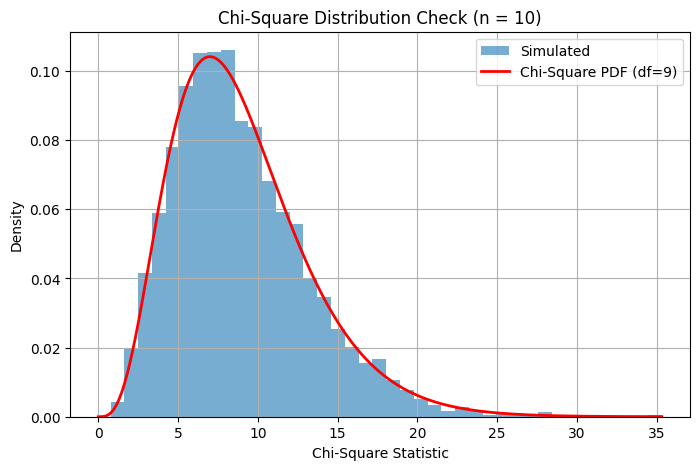

In [8]:
# Parameters
n = 10      # sample size
K = 5000    # number of repetitions

# Simulation
sample_variances = simulate_sample_variances(population, n, K)
chi_square_vals = chi_square_transform(sample_variances, n, sigma_square)

# Plot
plot_chi_square(chi_square_vals, n)


## Effect of Sample Size on Distribution


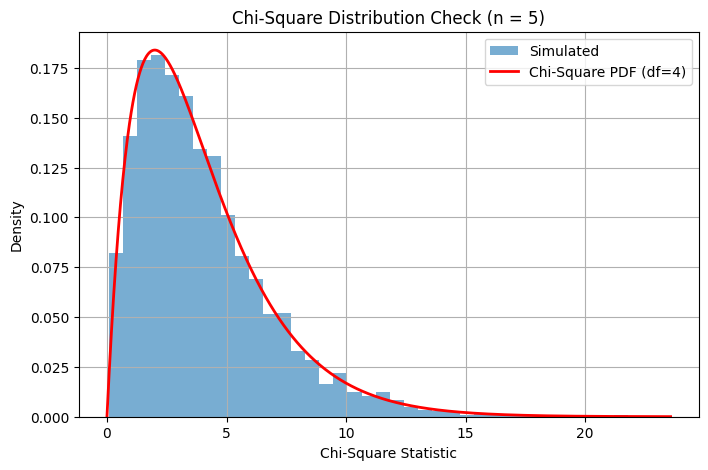

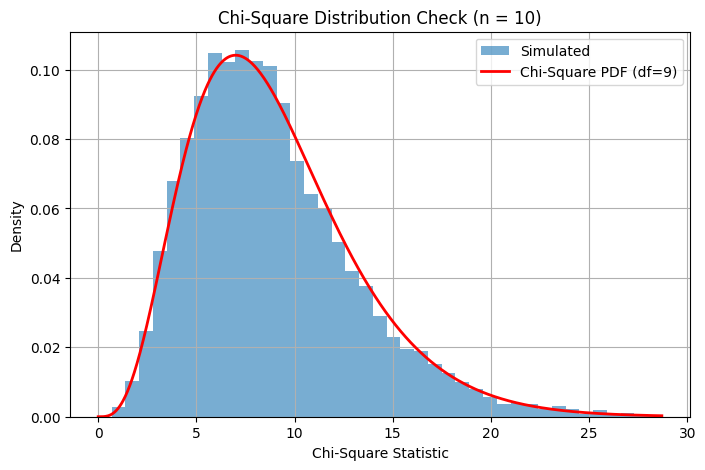

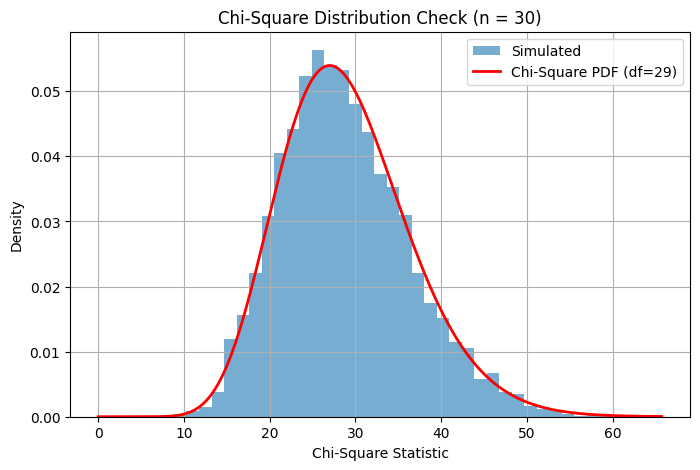

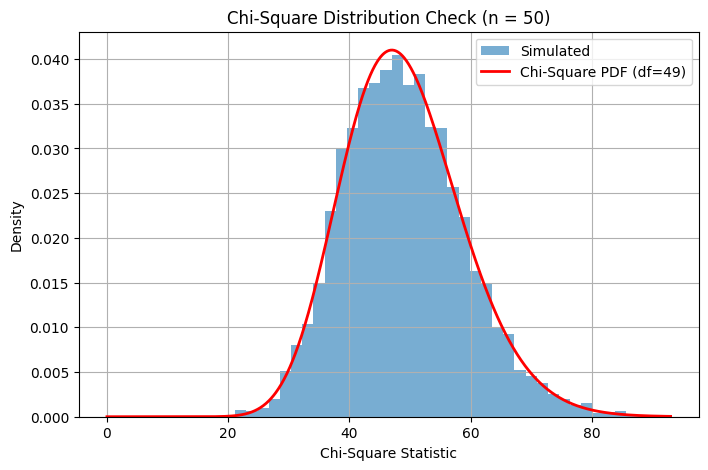

In [9]:
for n in [5, 10, 30, 50]:
    sample_variances = simulate_sample_variances(population, n, K)
    chi_vals = chi_square_transform(sample_variances, n, sigma_square)
    plot_chi_square(chi_vals, n)


## Observations

1. The transformed statistic closely follows the theoretical **Chi-Square distribution**.
2. As the sample size \( n \) increases:
   - The distribution becomes more symmetric.
   - The relative variability of the statistic decreases.
3. Increasing the number of repetitions \( K \) improves the smoothness and stability
   of the empirical histogram.
4. These results confirm the theoretical relationship:

$$
\frac{(n - 1) S^2}{\sigma^2} \sim \chi^2_{\,n-1}
$$

This property forms the basis of variance estimation, hypothesis testing,
and quality control procedures in statistical inference.


In [6]:
def interactive_chi_square(n, K):
    # Step 1: simulate sample variances
    sample_variances = []
    for _ in range(K):
        sample = np.random.choice(population, size=n, replace=False)
        S2 = np.var(sample, ddof=1)
        sample_variances.append(S2)

    sample_variances = np.array(sample_variances)

    # Step 2: Chi-square transformation
    y_vals = (n - 1) * sample_variances / sigma_square

    # Step 3: Theoretical PDF
    df = n - 1
    x = np.linspace(0, max(y_vals), 1000)
    pdf = chi2.pdf(x, df)

    # Step 4: Plot
    plt.figure(figsize=(8, 5))
    plt.hist(y_vals, bins=40, density=True, alpha=0.6, label="Simulated")
    plt.plot(x, pdf, 'r', lw=2, label=f"Chi-Square PDF (df={df})")
    plt.xlabel("Chi-Square Statistic")
    plt.ylabel("Density")
    plt.title(f"Chi-Square Check (n={n}, K={K})")
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
interact(
    interactive_chi_square,
    n=widgets.IntSlider(value=10, min=2, max=100, step=1, description="Sample size n"),
    K=widgets.IntSlider(value=2000, min=100, max=10000, step=100, description="Repetitions K")
)


interactive(children=(IntSlider(value=10, description='Sample size n', min=2), IntSlider(value=2000, descripti…

<function __main__.interactive_chi_square(n, K)>